In [431]:
# Загрузка нужных библиотек
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.svm  import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib

matplotlib.rc('figure', figsize=(10, 10))


Загрузим данные по росту и полу с https://gist.github.com/nstokoe/7d4717e96c21b8ad04ec91f361b000cb.

In [432]:
# Считываем табличку с данными и загружаем в массивы
# Рост в дюймах, вес в фунтах
df = pd.read_csv("weight-height.csv")
labels = df.Gender.to_numpy().reshape(-1, 1)
X = df[['Weight', 'Height']].to_numpy()

# Кодируем пол ноликами и единичками
enc = OrdinalEncoder()
enc.fit(labels)
y = enc.transform(labels).flatten()
df.Gender = y

Или с Каггла: https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset

In [302]:
# Считываем табличку с данными и загружаем в массивы
# Рост в дюймах, вес в фунтах
df1 = pd.read_csv("Test_set.csv")
df2 = pd.read_csv("Training_set.csv")
df = pd.concat([df2, df1])
labels = df.Gender.to_numpy().reshape(-1, 1)
X = df[['Weight', 'Height']].to_numpy()

# Кодируем пол ноликами и единичками
enc = OrdinalEncoder()
enc.fit(labels)
y = enc.transform(labels).flatten()
df.Gender = y

In [3]:
# Соберем данные
X = np.array([
    [40, 160],
    [42, 151],
    [50, 172],
    [45, 158],
    [39, 149],
    [43, 163],
    [65, 181],
    [48, 156],
    [51, 159],
    [50, 170]
])
y = np.array([
    1, 0, 1, 0, 1, 0, 0 , 1, 1, 1]
    )

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


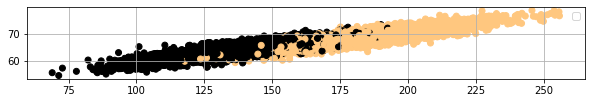

In [433]:
# Разобьем на трейн/тест без предобработки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42, stratify=y)

# sns.scatterplot(data=df, x='Weight', y='Height', hue='Gender')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='copper')
plt.gca().set_aspect('equal')
plt.grid()
plt.legend()
plt.show()

Result: [0.]


0.893

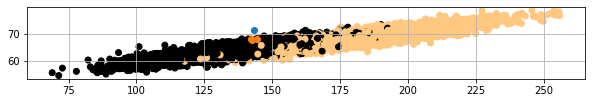

In [434]:
# Посмотрим, где нахожусь я и как меня классифицирует модель при n = 3
clf = KNeighborsClassifier(n_neighbors=3, p=2)
clf.fit(X_train, y_train)

# 65 kgs = 143.3 pounds
# 181 cm = 71.2598 inches
quiery = np.array([[143.3, 71.2598]])
n_neighbors = 3

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='copper')
plt.gca().set_aspect('equal')
plt.scatter(quiery[:, 0], quiery[:, 1])
plt.scatter(
    X_train[clf.kneighbors(quiery, n_neighbors=n_neighbors, return_distance=False)][0, :, 0],
    X_train[clf.kneighbors(quiery, n_neighbors=n_neighbors, return_distance=False)][0, :, 1]
    )
print(f"Result: {clf.predict(quiery)}")
plt.grid()
clf.score(X_test, y_test)

In [403]:
# Перебор гиперпараметров для kNN с помощью кросс-валидации
best_score = 0
scores = []
broken_scores = []
best_n = 3
for n in range(3,100,1):
    clf = KNeighborsClassifier(n_neighbors=n, metric="minkowski", p=2, weights='uniform')

    # Честная кросс-валидация
    score = cross_val_score(clf, X_train, y_train, cv=5)
    scores.append(np.mean(score))
    broken_score = cross_val_score(clf, X, y, cv=5)
    broken_scores.append(np.mean(broken_score))
    if np.mean(score) > best_score:
        best_score = np.mean(score)
        best_n = n
    # print(score, f"n={n}")
clf = KNeighborsClassifier(n_neighbors=best_n)
clf.fit(X_train, y_train)
test_scores = clf.score(X_test, y_test)
print(f"Test score: {test_scores}", f"n={best_n}")

Test score: 0.9205 n=39


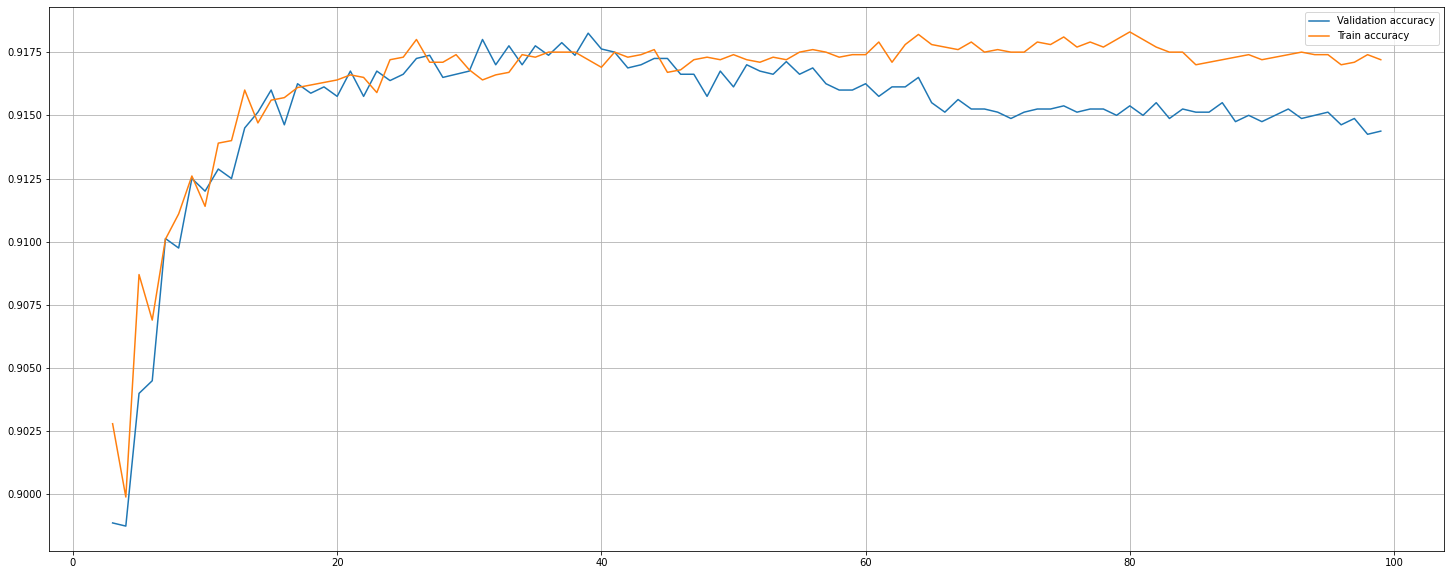

In [404]:
# График средних accuracy
plt.figure(figsize=(25, 10))
plt.plot(np.arange(3,100), scores, label="Validation accuracy")
plt.plot(np.arange(3,100), broken_scores, label="Train accuracy")
plt.grid()
plt.legend()

In [405]:
# Перебор гиперпараметров для SVM
best_score = 0
scores = []
best_n = 3
for n in range(1,5,1):
    clf = SVC(C=n, kernel='linear')
    score = cross_val_score(clf, X_train, y_train, cv=5)
    scores.append(np.mean(score))
    if np.mean(score) > best_score:
        best_score = np.mean(score)
        best_n = n
    # print(score, f"n={n}")
clf = clf = SVC(C=best_n, kernel='linear')
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test), f"n={best_n}")

0.922 n=4


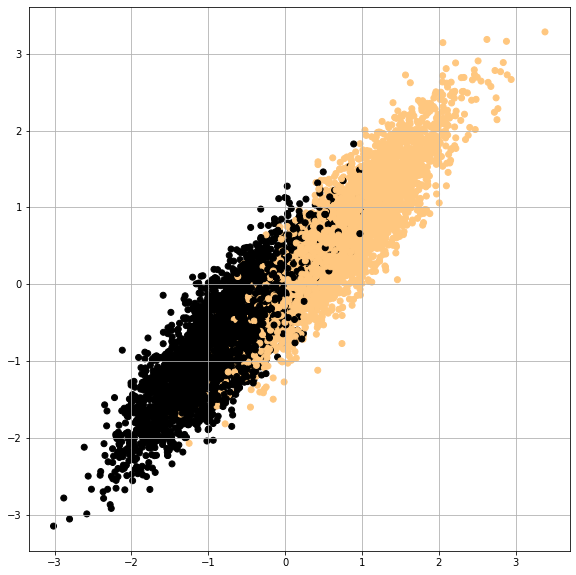

In [411]:
# Разобьем на трейн/тест c предобработкой
X_scaled =( X - X.mean(axis=0))/X.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42)

# sns.scatterplot(data=df, x='Weight', y='Height', hue='Gender')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='copper')
plt.gca().set_aspect('equal')
plt.grid()
plt.show()

Result: [0.]


0.914

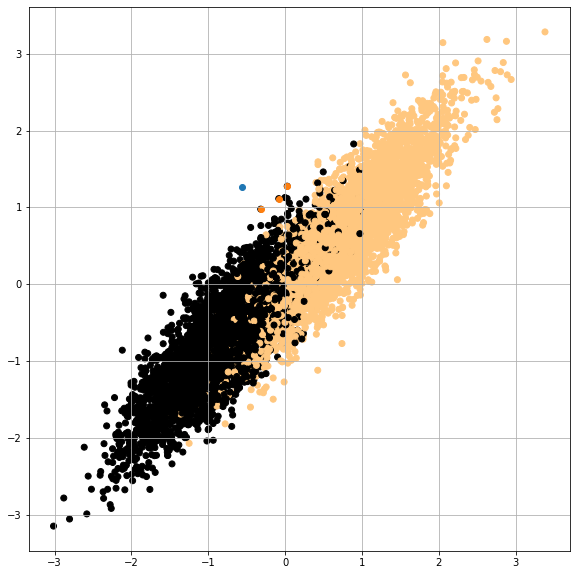

In [412]:
n_neighbors = 3
clf = KNeighborsClassifier(n_neighbors=n_neighbors, p=1)
clf.fit(X_train, y_train)

# 65 kgs = 143.3 pounds
# 181 cm = 71.2598 inches
quiery = (np.array([[143.3, 71.2598]]) - X.mean(axis=0))/X.std(axis=0)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='copper')
plt.gca().set_aspect('equal')
plt.scatter(quiery[:, 0], quiery[:, 1])
plt.scatter(
    X_train[clf.kneighbors(quiery, n_neighbors=n_neighbors, return_distance=False)][0, :, 0],
    X_train[clf.kneighbors(quiery, n_neighbors=n_neighbors, return_distance=False)][0, :, 1]
    )
print(f"Result: {clf.predict(quiery)}")
plt.grid()
clf.score(X_test, y_test)

In [408]:
# Перебор гиперпараметров для kNN с помощью кросс-валидации
best_score = 0
scores = []
best_n = 3
for n in range(3,300,1):
    clf = KNeighborsClassifier(n_neighbors=n, metric="minkowski", p=2, weights='uniform')
    score = cross_val_score(clf, X_train, y_train, cv=5)
    scores.append(np.mean(score))
    if np.mean(score) > best_score:
        best_score = np.mean(score)
        best_n = n
    # print(score, f"n={n}")
clf = KNeighborsClassifier(n_neighbors=best_n)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test), f"n={best_n}")

0.926 n=25


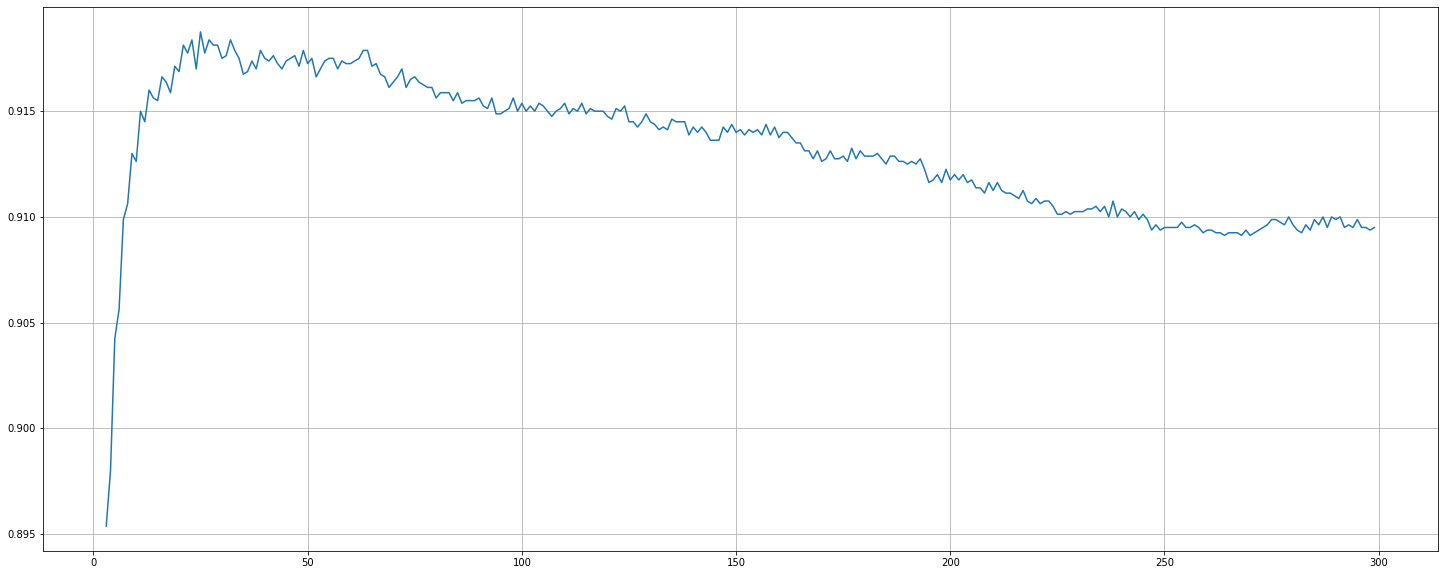

In [409]:
# График средних accuracy
plt.figure(figsize=(25, 10))
plt.plot(np.arange(3,300), scores)
plt.grid()

In [413]:
# Перебор гиперпараметров для SVM
# Перебор гиперпараметров для SVM
best_score = 0
scores = []
best_n = 3
for n in range(1,7,1):
    clf = SVC(C=n, kernel='linear')
    score = cross_val_score(clf, X_train, y_train, cv=5)
    scores.append(np.mean(score))
    if np.mean(score) > best_score:
        best_score = np.mean(score)
        best_n = n
    # print(score, f"n={n}")
clf = clf = SVC(C=best_n, kernel='linear')
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test), f"n={best_n}")

0.925 n=1


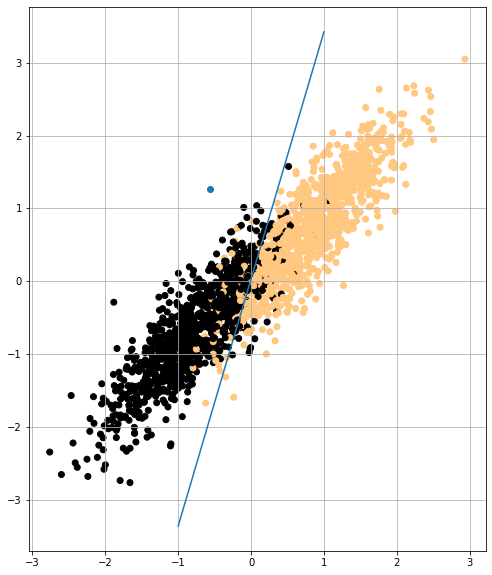

In [414]:
plane = lambda x: (-clf.coef_[0][0]/clf.coef_[0][1])*x - clf.intercept_[0]/clf.coef_[0][1]
x = np.linspace(-1, 1, 100)
plt.scatter(quiery[:, 0], quiery[:, 1])
plt.plot(x, plane(x))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='copper')
plt.gca().set_aspect('equal')
plt.grid()
plt.show()

Легким движением руки перейдем к задаче регрессии

In [435]:
# Теперь пусть признаками будут рост и пол, будем предсказывать вес
X = df[['Gender', 'Height']].to_numpy()
y = df.Weight.to_numpy()

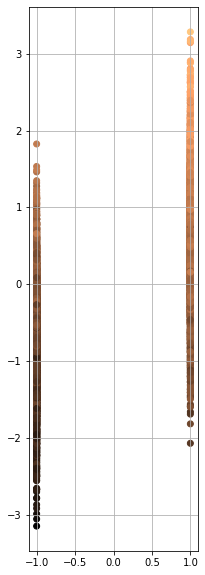

In [438]:
# Разобьем на трейн/тест c предобработкой
X_scaled =( X - X.mean(axis=0))/X.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=True, random_state=42)

# sns.scatterplot(data=df, x='Weight', y='Height', hue='Gender')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='copper')
plt.gca().set_aspect('equal')
plt.grid()
plt.show()

Result: [201.14055048]


0.8917942315180379

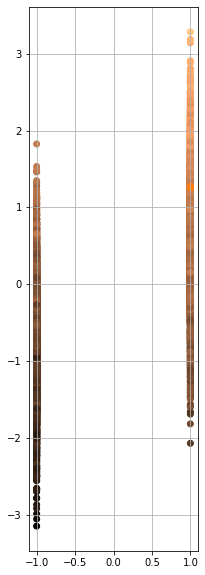

In [439]:
n_neighbors = 10
clf = KNeighborsRegressor(n_neighbors=n_neighbors, p=2, weights='uniform', metric='minkowski')
clf.fit(X_train, y_train)

# 65 kgs = 143.3 pounds
# 181 cm = 71.2598 inches
quiery = (np.array([[1, 71.2598]]) - X.mean(axis=0))/X.std(axis=0)
# quiery = np.array([[1, 71.2598]])


plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='copper')
plt.gca().set_aspect('equal')
plt.scatter(quiery[:, 0], quiery[:, 1])
plt.scatter(
    X_train[clf.kneighbors(quiery, n_neighbors=n_neighbors, return_distance=False)][0, :, 0],
    X_train[clf.kneighbors(quiery, n_neighbors=n_neighbors, return_distance=False)][0, :, 1]
    )
print(f"Result: {clf.predict(quiery)}")
plt.grid()
clf.score(X_test, y_test)

In [441]:
# Перебор гиперпараметров для kNN с помощью кросс-валидации
best_score = 0
scores = []
broken_scores = []
best_n = 3
for n in range(3,500,1):
    clf = KNeighborsRegressor(n_neighbors=n, metric="minkowski", p=2, weights='uniform')
    score = cross_val_score(clf, X_train, y_train, cv=5)
    scores.append(np.mean(score))
    # broken_score = cross_val_score(clf, X, y, cv=5)
    # broken_scores.append(np.mean(broken_score))
    if np.mean(score) > best_score:
        best_score = np.mean(score)
        best_n = n
    # print(score, f"n={n}")
clf = KNeighborsRegressor(n_neighbors=best_n)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test), f"n={best_n}")

0.9018939980166871 n=89


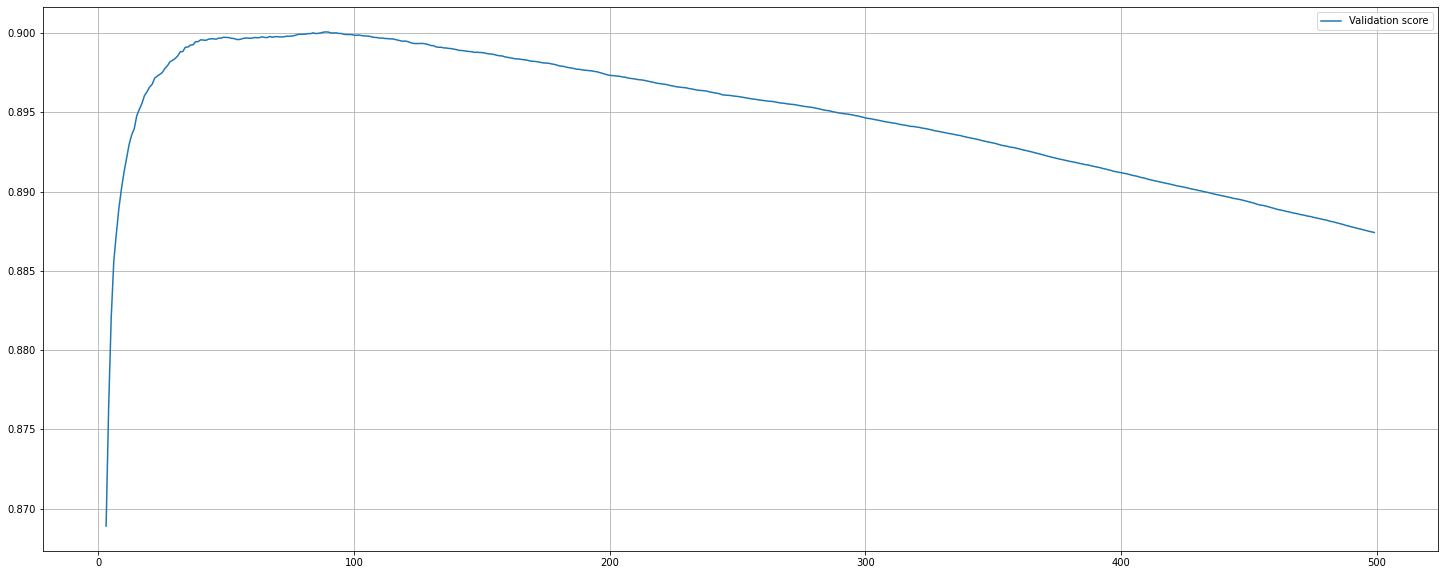

In [442]:
# График средних R^2
plt.figure(figsize=(25, 10))
plt.plot(np.arange(3,500), scores, label="Validation score")
# plt.plot(np.arange(3,500), broken_scores, label="Train score")
plt.grid()
plt.legend()